In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Explain the dataset.

In [28]:
dataset= pd.read_csv('C:/Users/user/Desktop/Advertising (1).csv')


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [30]:
dataset.shape

(200, 5)

In [32]:
dataset=dataset.drop('Unnamed: 0',axis=1)

# 2.Check the summary statistics and discuss the max, min, avg, median,and percentile.


In [33]:
dataset.describe(include = 'all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# 3.Draw a scatter plot between TV and sales and write your insights.

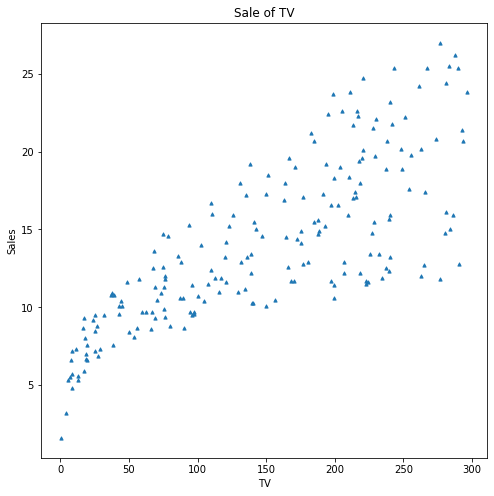

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(dataset['TV'], dataset['Sales'], s=10, marker="^")
plt.title("Sale of TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

##### Based on the above scatter plot, we can conclude that it follows a strong positive linear relationship. Therefore, as TV advertisements increase, sales also increase.

# 4.Do a correlation analysis on the data set.

<AxesSubplot:>

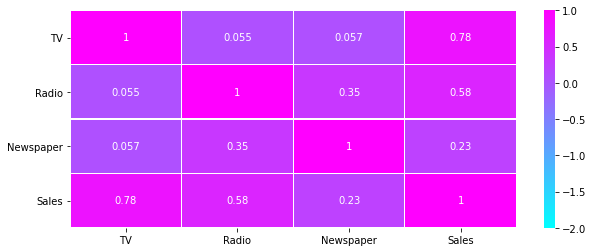

In [35]:
corrmatrix = dataset.corr()
plt.subplots(figsize = (10,4))
sns.heatmap(corrmatrix , vmin = -2 , vmax =1 , annot=True , linewidth=0.2 , cmap ="cool")

###### Based on the above heatmap, we can conclude that TV is correlated with sales strongly, radio is correlated with sales moderately, and newspapers are correlated weakly with sales.

# 5.Fit a linear regression model on the dataset.

In [36]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [37]:
y = dataset['Sales']
x = dataset.drop(['Sales'],axis=1)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [39]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [40]:
model = lr.fit(x_train,y_train)

In [41]:
predictions = model.predict(x_test)

In [42]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
Name: Sales, dtype: float64


In [43]:
print(predictions)

[16.38348211 20.92434957 21.61495426 10.49069997 22.17690456 13.02668085
 21.10309295  7.31813008 13.56732111 15.12238649  8.92494113  6.49924401
 14.30119928  8.77233515  9.58665483 12.09485291  8.59621605 16.25337881
 10.16948105 18.85753401 19.5799036  13.15877029 12.25103735 21.35141984
  7.69607607  5.64686906 20.79780073 11.90951247  9.06581044  8.37295611
 12.40815899  9.89416076 21.42707658 12.14236853 18.28776857 20.18114718
 13.99303029 20.89987736 10.9313953   4.38721626  9.58213448 12.6170249
  9.93851933  8.06816257 13.45497849  5.25769423  9.15399537 14.09552838
  8.71029827 11.55102817]


In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 2.880023730094192
